In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.sample(5)

,text,spam
2208,Subject: re : looking for someone who has expe...,0
4834,Subject: re : ll visa - anshuman shrivastava ...,0
3906,"Subject: grant , would you take a look at the...",0
2866,"Subject: real option conference vince , i wa...",0
3034,"Subject: re : benchmarking study sally , tha...",0


- 0 = not spam
- 1 = spam

In [4]:
df.shape

(5728, 2)

In [5]:
df.rename(columns={'spam' : "target"}, inplace = True)

In [6]:
# 1.Data cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   target  5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [9]:
df.duplicated().sum()

33

In [10]:
df = df.drop_duplicates(keep = "first") # droping the dupicates values

In [11]:
df.shape

(5695, 2)

## 2.EDA

In [12]:
df.head()

,text,target
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [13]:
df['target'].value_counts()

target
0    4327
1    1368
Name: count, dtype: int64

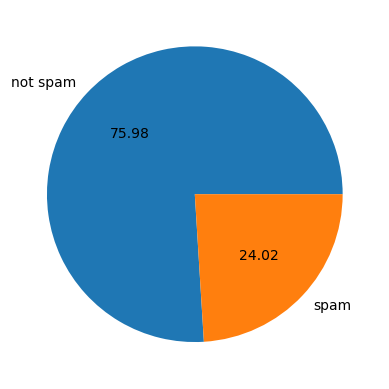

In [14]:
plt.pie(df['target'].value_counts(), labels = ["not spam", "spam"], autopct = "%0.2f")
plt.show()

In [80]:
!pip install nltk

In [17]:
import nltk

In [18]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91812\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df["num_characters"] = df['text'].apply(len)

In [20]:
df['num_word'] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df[["num_characters",'num_word','num_sent']].describe()

,num_characters,num_word,num_sent
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [24]:
# not spam
df[df["target"] == 0][["num_characters",'num_word','num_sent']].describe()

,num_characters,num_word,num_sent
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [25]:
# spam
df[df["target"] == 1][["num_characters",'num_word','num_sent']].describe()

,num_characters,num_word,num_sent
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


<Axes: xlabel='num_characters', ylabel='Count'>

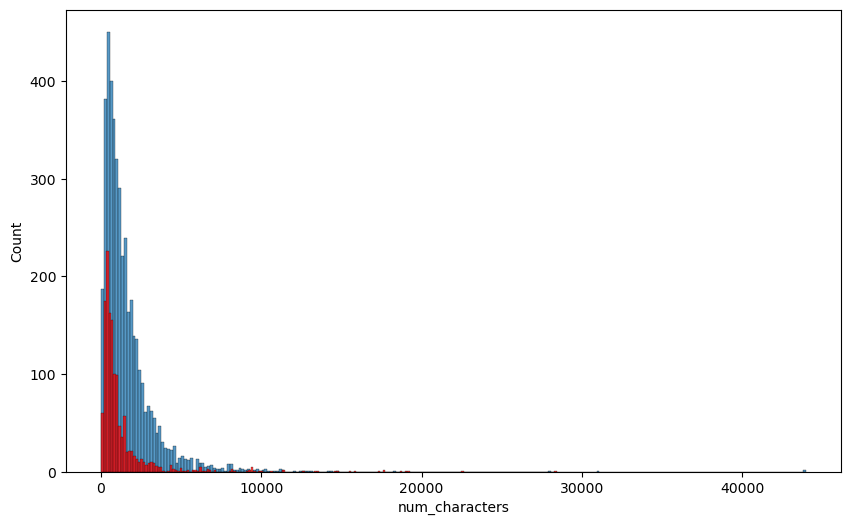

In [26]:
plt.figure(figsize = (10,6))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color = "red")

<Axes: xlabel='num_word', ylabel='Count'>

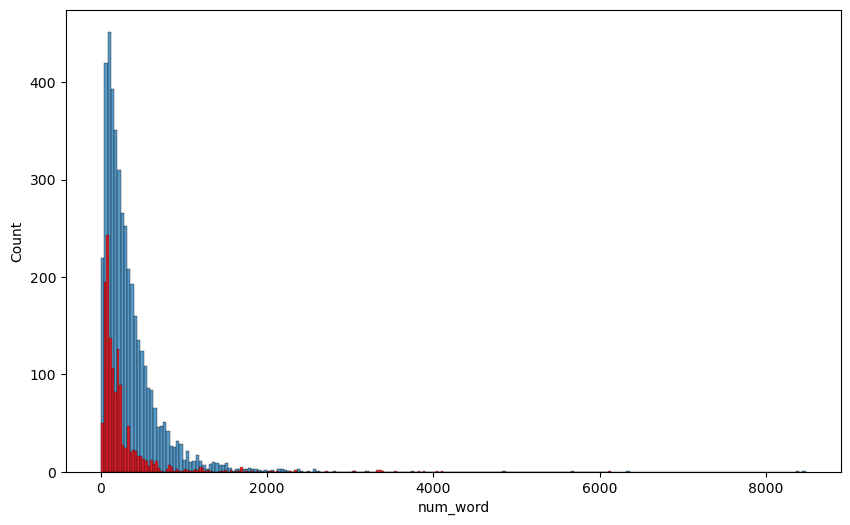

In [27]:
plt.figure(figsize = (10,6))
sns.histplot(df[df["target"] == 0]["num_word"])
sns.histplot(df[df["target"] == 1]["num_word"], color = "red")

<Axes: xlabel='num_sent', ylabel='Count'>

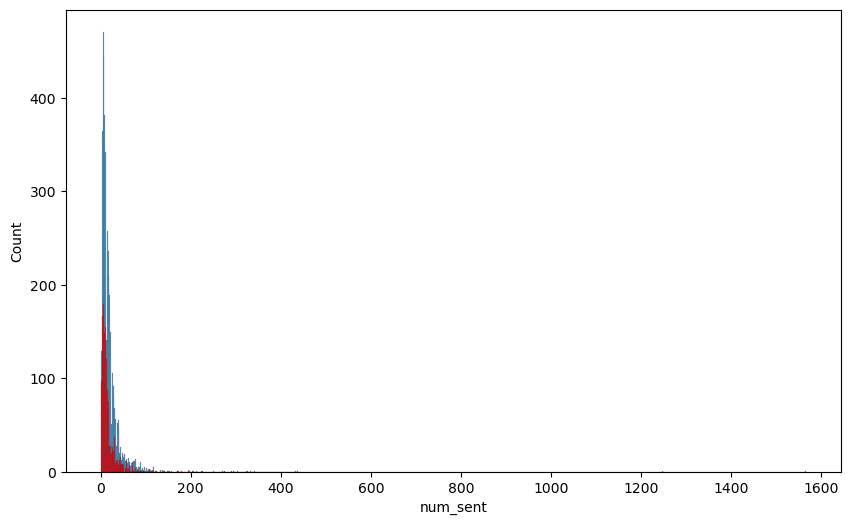

In [28]:
plt.figure(figsize = (10,6))
sns.histplot(df[df["target"] == 0]["num_sent"])
sns.histplot(df[df["target"] == 1]["num_sent"], color = "red")

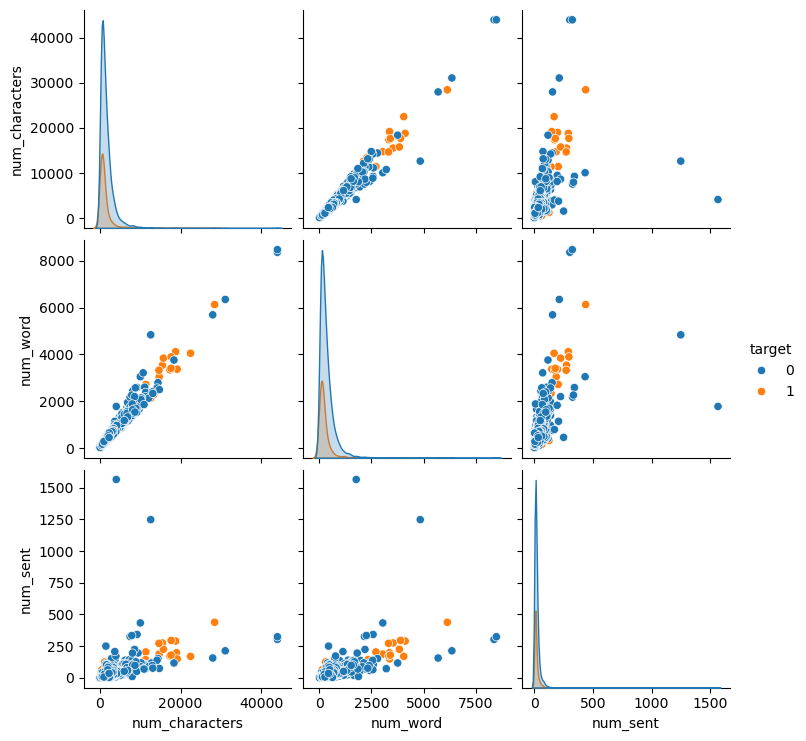

In [29]:
sns.pairplot(df,hue = "target")

<Axes: >

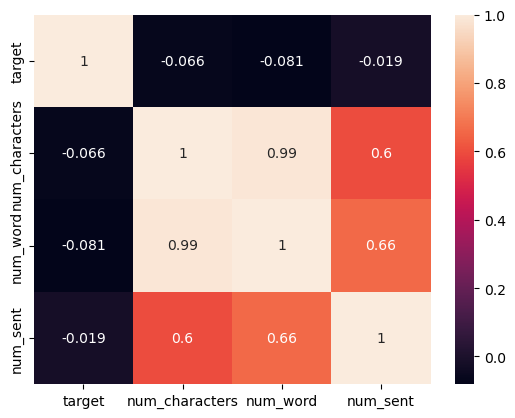

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

## 3.Data Preprocessing
- Lower case
- Tokenization
- Removing special character
- Removing Stop words and punctuation
-stemming

In [31]:
from nltk.corpus import stopwords
import string

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91812\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def transform_text(input_text):
    # Convert text to lowercase
    text = input_text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Initialize a list to hold cleaned words
    cleaned_words = []

    # Remove non-alphanumeric tokens and stopwords
    for word in text:
        if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
            cleaned_words.append(word)
    text =  cleaned_words[:]
    cleaned_words.clear()
    for i in text:
        cleaned_words.append(ps.stem(i))
    return " ".join(cleaned_words)

In [35]:
transform_text(df["text"][10])

'subject la vega high rise boom la vega fast becom major metropolitan citi 60 new high rise tower expect built around la vega strip within next 3 4 year 30 000 condominium boom begun buy first earli phase pre construct price avail la vega high rise includ trump cosmopolitan mgm turnberri icon sky among other join interest list http www verticallv com messag sent realti one highris learn www verticallv comif wish exclud futur mail pleas repli word remov subject line'

In [36]:
df["transform_text"] = df['text'].apply(transform_text)

In [37]:
!pip install wordcloud

In [38]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

In [39]:
spam_wc = wc.generate(df[df['target'] == 1]["transform_text"].str.cat(sep = " "))

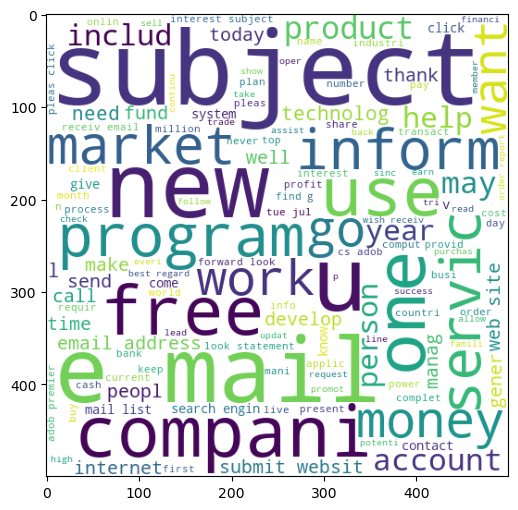

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [41]:
not_spam_wc = wc.generate(df[df['target'] == 0]["transform_text"].str.cat(sep = " "))

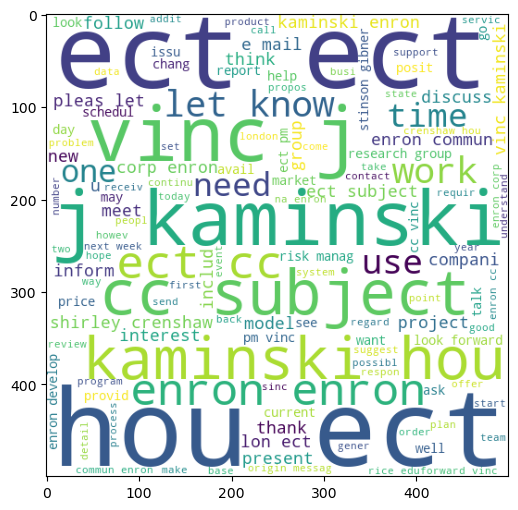

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(not_spam_wc)

In [43]:
df.head()

,text,target,num_characters,num_word,num_sent,transform_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [44]:
spam_corpus = []
for email in df[df["target"] == 1]['transform_text'].tolist():
    for word in email.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)

174630

In [46]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('subject', 1577),
 ('compani', 1065),
 ('com', 1000),
 ('1', 952),
 ('mail', 917),
 ('busi', 897),
 ('email', 865),
 ('inform', 818),
 ('receiv', 727),
 ('e', 701),
 ('get', 694),
 ('5', 687),
 ('money', 662),
 ('pleas', 619),
 ('2', 613),
 ('free', 606),
 ('3', 604),
 ('make', 603),
 ('http', 603),
 ('market', 600),
 ('time', 593),
 ('one', 592),
 ('000', 560),
 ('click', 552),
 ('use', 546),
 ('order', 541),
 ('invest', 540),
 ('us', 537),
 ('offer', 528),
 ('secur', 520)]

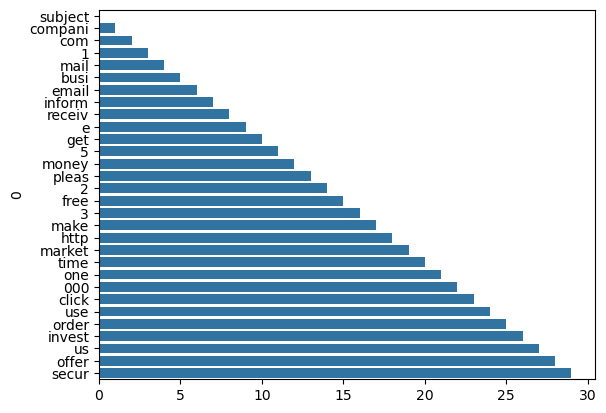

In [47]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.show()

In [48]:
not_spam_corpus = []
for email in df[df["target"] == 0]['transform_text'].tolist():
    for word in email.split():
        not_spam_corpus.append(word)

In [49]:
len(not_spam_corpus)

702991

In [50]:
from collections import Counter
Counter(not_spam_corpus).most_common(30)

[('enron', 13335),
 ('ect', 11410),
 ('subject', 8565),
 ('vinc', 8468),
 ('hou', 5567),
 ('2000', 4932),
 ('kaminski', 4754),
 ('pleas', 4440),
 ('com', 4397),
 ('would', 4124),
 ('cc', 3862),
 ('j', 3669),
 ('thank', 3537),
 ('pm', 3247),
 ('2001', 3021),
 ('forward', 2943),
 ('research', 2713),
 ('time', 2534),
 ('meet', 2520),
 ('1', 2471),
 ('group', 2451),
 ('know', 2329),
 ('manag', 2326),
 ('2', 2295),
 ('work', 2265),
 ('10', 2206),
 ('price', 2164),
 ('model', 2153),
 ('market', 2134),
 ('energi', 2112)]

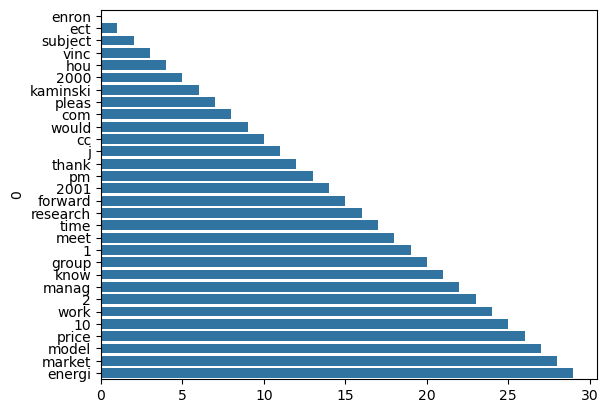

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0])
plt.show()

## 4. Model building

In [52]:
# bag of words
# tfidf

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [54]:
cv = CountVectorizer()

In [55]:
X = cv.fit_transform(df['transform_text']).toarray()

In [56]:
X.shape

(5695, 29220)

In [57]:
y = df['target'].values

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.95171202809482
[[834  15]
 [ 40 250]]
0.9433962264150944


In [62]:
mnb.fit(x_train,y_train)
y_pred2 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.95171202809482
[[834  15]
 [ 40 250]]
0.9433962264150944


In [63]:
bnb.fit(x_train,y_train)
y_pred3 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.95171202809482
[[834  15]
 [ 40 250]]
0.9433962264150944


In [64]:
tfidf = TfidfVectorizer()
TfidfVectorizer()

TfidfVectorizer()

In [65]:
x2 = tfidf.fit_transform(df['transform_text']).toarray()
y2 = df['target'].values

In [66]:
x2.shape

(5695, 29220)

In [67]:
x1_train, x1_test , y1_train, y1_test = train_test_split(x2,y2,test_size = 0.2, random_state = 2)

In [69]:
gnb.fit(x1_train,y1_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))

print( "******************************\n")

mnb.fit(x1_train,y1_train)
y_pred2 = gnb.predict(x1_test)
print(accuracy_score(y1_test,y_pred2))
print(confusion_matrix(y1_test,y_pred2))
print(precision_score(y1_test,y_pred2))

print( "******************************\n")

bnb.fit(x1_train,y1_train)
y_pred3 = gnb.predict(x1_test)
print(accuracy_score(y1_test,y_pred3))
print(confusion_matrix(y1_test,y_pred3))
print(precision_score(y1_test,y_pred3))

0.9578577699736611
[[845   4]
 [ 44 246]]
0.984
******************************

0.9490781387181738
[[836  13]
 [ 45 245]]
0.9496124031007752
******************************

0.9490781387181738
[[836  13]
 [ 45 245]]
0.9496124031007752


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
svm = SVC(kernel = "sigmoid", gamma = 1.0)
lr = LogisticRegression(solver = "liblinear", penalty = "l1")
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators =50,random_state=2)
mnb = MultinomialNB()
abc = AdaBoostClassifier(n_estimators = 50, random_state=2)
bc = BaggingClassifier(n_estimators = 50, random_state=2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state=2)
# xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [72]:
clfs = {
    'SVM' : svm,
    "KN": knn,
    'NB': mnb,
    "DT":dtc,
    "RF":rfc,
    "LR":lr,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt
    # 'xgb':xgb
}

In [73]:
def train_classifier(clfs,x_train,y_train,x_test,y_test):
  clfs.fit(x_train,y_train)
  y_pred = clfs.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy, precision

In [ ]:
# train_classifier(svm,x_train,y_train,x_test,y_test)
!pip install XGB

In [82]:
accuracy_scores = [] # rename the variable to avoid conflict with function name
precision_scores = [] # rename the variable to avoid conflict with function name
for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
  print('For', name)
  print("Accuracy", current_accuracy)
  print("Precision", current_precision)

  accuracy_scores.append(current_accuracy) # append to the renamed list
  precision_scores.append(current_precision) # append to the renamed list

For SVM
Accuracy 0.8191395961369623
Precision 0.6693548387096774
For KN
Accuracy 0.8999122036874452
Precision 0.94
For NB
Accuracy 0.9929762949956101
Precision 0.9795918367346939
For DT
Accuracy 0.9657594381035997
Precision 0.9434628975265018
For RF
Accuracy 0.9727831431079894
Precision 0.9923954372623575
For LR
Accuracy 0.9824407374890255
Precision 0.9655172413793104


C:\Users\91812\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy 0.9683933274802459
Precision 0.9123376623376623
For BgC
Accuracy 0.971027216856892
Precision 0.9415807560137457
For ETC
Accuracy 0.971027216856892
Precision 1.0
For GBDT
Accuracy 0.9587357330992098
Precision 0.9619771863117871


In [87]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.971027,1.000000
4,RF,0.972783,0.992395
2,NB,0.992976,0.979592
5,LR,0.982441,0.965517
9,GBDT,0.958736,0.961977
3,DT,0.965759,0.943463
7,BgC,0.971027,0.941581
1,KN,0.899912,0.940000
6,AdaBoost,0.968393,0.912338
0,SVM,0.819140,0.669355


In [86]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending = False) 


In [88]:
tfidf = TfidfVectorizer(max_features = 3000)

In [89]:
x2 = tfidf.fit_transform(df['transform_text']).toarray()
y2 = df['target'].values
x2_train, x2_test , y2_train, y2_test = train_test_split(x2,y2,test_size = 0.2, random_state = 2)

In [90]:
x2 = tfidf.fit_transform(df['transform_text']).toarray()
y2 = df['target'].values
x2_train, x2_test , y2_train, y2_test = train_test_split(x2,y2,test_size = 0.2, random_state = 2)

In [91]:
accuracy_scores = [] # rename the variable to avoid conflict with function name
precision_scores = [] # rename the variable to avoid conflict with function name
for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,x2_train,y2_train,x2_test,y2_test)
  print('For', name)
  print("Accuracy", current_accuracy)
  print("Precision", current_precision)

  accuracy_scores.append(current_accuracy) # append to the renamed list
  precision_scores.append(current_precision) 

For SVM
Accuracy 0.990342405618964
Precision 0.9929328621908127
For KN
Accuracy 0.9771729587357331
Precision 0.9782608695652174
For NB
Accuracy 0.9850746268656716
Precision 0.989247311827957
For DT
Accuracy 0.9525899912203687
Precision 0.906896551724138
For RF
Accuracy 0.9824407374890255
Precision 0.9927007299270073
For LR
Accuracy 0.971027216856892
Precision 0.9706959706959707


C:\Users\91812\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy 0.9692712906057945
Precision 0.967032967032967
For BgC
Accuracy 0.9657594381035997
Precision 0.9403508771929825
For ETC
Accuracy 0.9833187006145742
Precision 0.9927272727272727
For GBDT
Accuracy 0.9561018437225637
Precision 0.9651162790697675


In [92]:
performance_df2 = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending = False) 


In [93]:
performance_df2

,Algorithm,Accuracy,Precision
0,SVM,0.990342,0.992933
8,ETC,0.983319,0.992727
4,RF,0.982441,0.992701
2,NB,0.985075,0.989247
1,KN,0.977173,0.978261
5,LR,0.971027,0.970696
6,AdaBoost,0.969271,0.967033
9,GBDT,0.956102,0.965116
7,BgC,0.965759,0.940351
3,DT,0.952590,0.906897


In [97]:
result = pd.concat([performance_df, performance_df2], axis=1)

In [98]:
result

,Algorithm,Accuracy,Precision,Algorithm,Accuracy,Precision
8,ETC,0.971027,1.000000,ETC,0.983319,0.992727
4,RF,0.972783,0.992395,RF,0.982441,0.992701
2,NB,0.992976,0.979592,NB,0.985075,0.989247
5,LR,0.982441,0.965517,LR,0.971027,0.970696
9,GBDT,0.958736,0.961977,GBDT,0.956102,0.965116
3,DT,0.965759,0.943463,DT,0.952590,0.906897
7,BgC,0.971027,0.941581,BgC,0.965759,0.940351
1,KN,0.899912,0.940000,KN,0.977173,0.978261
6,AdaBoost,0.968393,0.912338,AdaBoost,0.969271,0.967033
0,SVM,0.819140,0.669355,SVM,0.990342,0.992933


we take tfifd max = 3000 ETC  model because it gives maxmum precision and Maximum accuracy